# Formatierungen für Plots
04.05.2023 (Achsen, Lines, Merkblatt und verrückte Spielereien)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import ticker
import seaborn as sns

## Titel, Labels und Ticks

Eine gute Infografik braucht einen angemessenen Titel, Beschriftungen und auch geeignete Ticks. Wenn es um Geld geht, ist es besser, ein Währungssymbol wie "$" zu verwenden, und wenn es sich um große Zahlen handelt, sollten Sie sie in Tausend (K), Millionen (M), Milliarden (B) usw. formatieren. Kleinere Zahlen sollten auf die nächste Dezimalstelle gerundet werden, mehr als 3 Dezimalstellen sind eigentlich nicht nötig. Optimal sind häufig 2 Dezimalstellen. Außerdem sollten  Häufigkeiten mit 100 multipliziert werden, um sie in Prozentsätze umzuwandeln, und nach jeder dritten Ziffer einer großen Zahl ein '.' hinzufügen, d. h. 1000000 sollte als 1.000.000 geschrieben werden.

Schließlich müssen der Titel und die Häkchen sichtbar sein, also ist eine lesbare Größe erforderlich.


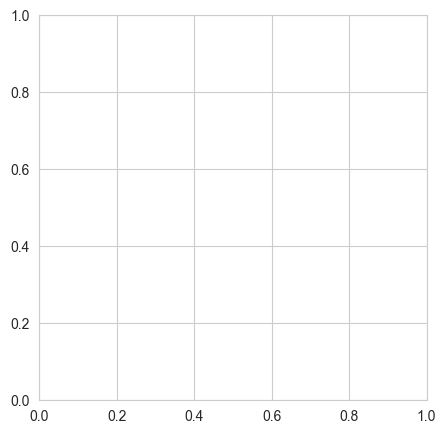

In [9]:
#Erstellen von Figuren
fig,ax = plt.subplots(figsize=(5,5))

Text(0.5, 1.0, 'Title')

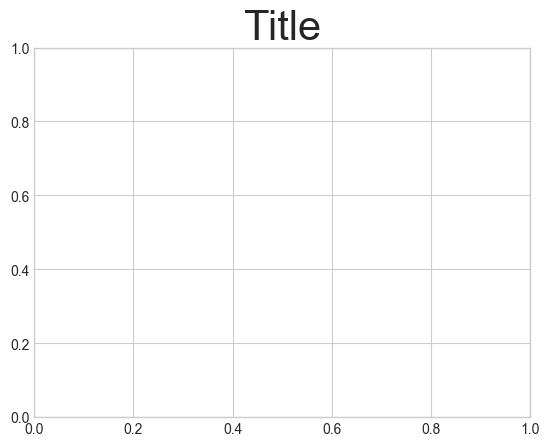

In [14]:
#Titel hinzufügen und Schriftgröße festlegen
plt.title('Title',fontsize=30)

Text(0.5, 1.0, 'This is Title')

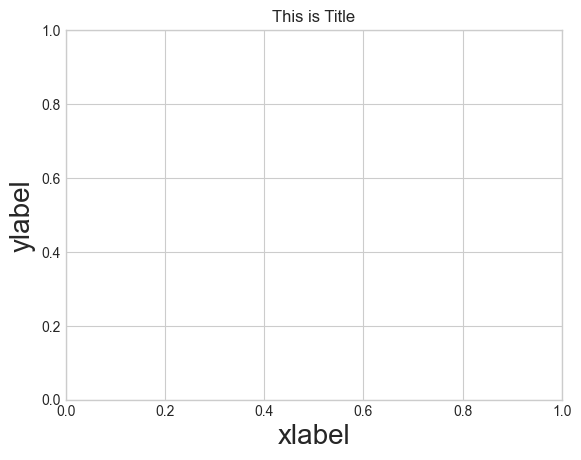

In [99]:
#X-Achsen-Beschriftung und Y-Achsen-Beschriftung hinzufügen, mit Schriftgröße
plt.xlabel('xlabel',fontsize=20)
plt.ylabel('ylabel',fontsize=20)
plt.title("This is Title")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

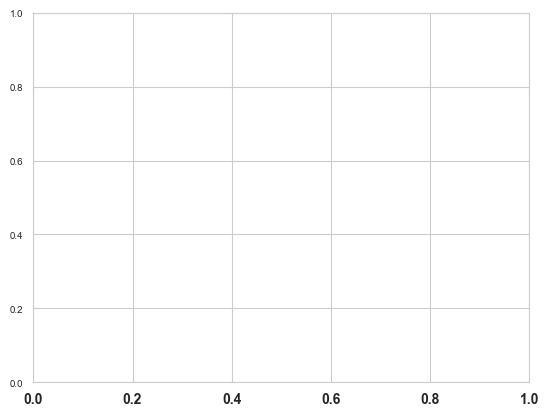

In [25]:
#Tick-Größe und Schriftstil [ 'normal' | 'bold' | 'heavy' | 'light' | #'ultrabold' | 'ultralight']
plt.yticks(fontsize=7,weight='light')
plt.xticks(fontsize=10,weight='bold')

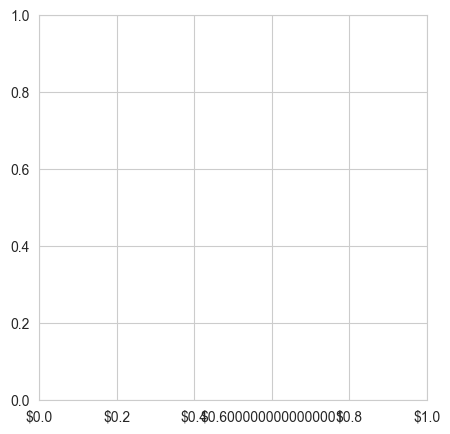

In [30]:
#Formatierung von Ticks als Währung oder beliebiges Präfix (ersetze $ durch jedes Zeichen)
fig,ax = plt.subplots(figsize=(5,5))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x}"))

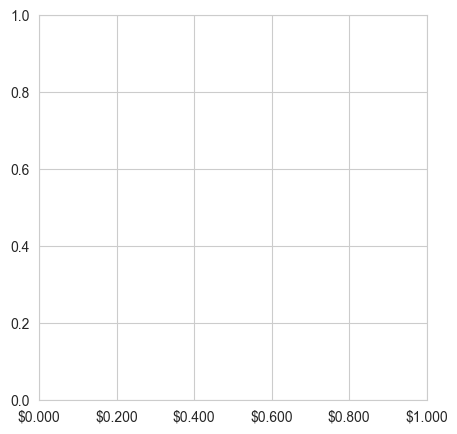

In [73]:
#Das Formatieren der Dezimalstellen der Ticks, die Zahl vor dem f gibt an, wie viele
#Dezimalstellen z.B. .3f für drei 
fig,ax = plt.subplots(figsize=(5,5))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:.3f}"))

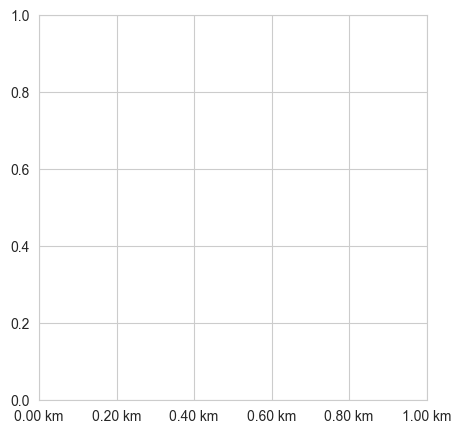

In [74]:
#Ticks als Entfernung oder beliebiges Suffix formatieren (km durch Wahl ersetzen)
fig,ax = plt.subplots(figsize=(5,5))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f} km"))

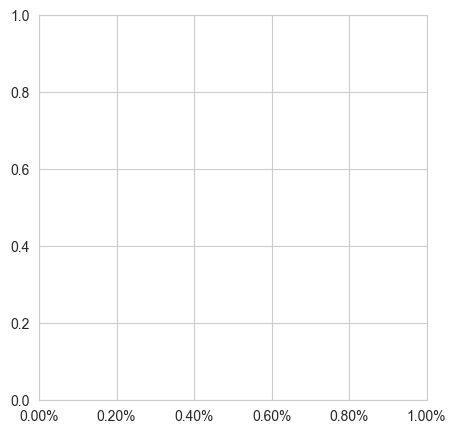

In [108]:
#Formatiere als Prozent 
fig,ax = plt.subplots(figsize=(5,5))
ax.xaxis.set_major_formatter(ticker.PercentFormatter())

In [65]:
#Was war nochmal lambda?
addition = lambda x, y: x+y
addition(2,6)

8

In [67]:
#Was ist format()?
format(4.256, "0.1f")

'4.3'

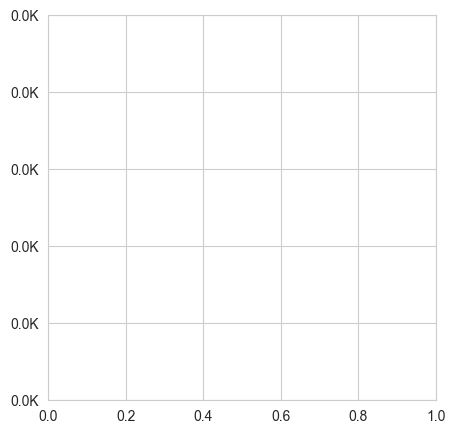

In [77]:
#Formatiere Tausende z.B. 10000 zu 10.0K
fig,ax = plt.subplots(figsize=(5,5))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: format(x/1000,'0.1f')+'K'))

### Miniübung: 
Wie schreibt man jetzt die Umwandlung zu Millionen? (mit lambda)

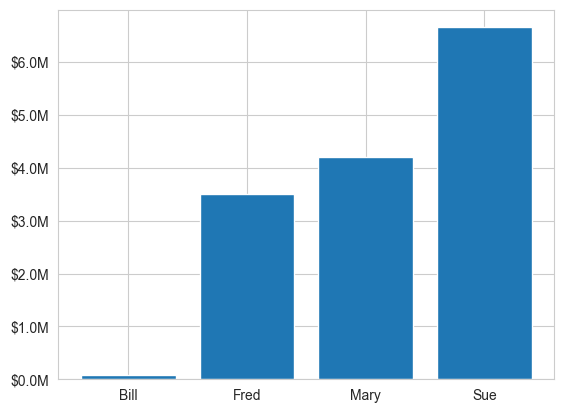

In [79]:
#Komplett eigenen Ticker einsetzen (mit def statt lambda)
def milliondollar(x, pos):
    return f'${x*1e-6:1.1f}M'

#Plot erstellen und Achsenformatierung aus Funktion verwenden
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(milliondollar))

#Daten eingeben
money = [0.815e5, 3.50e6, 4.20e6, 6.66e6]
ax.bar(['Bill', 'Fred', 'Mary', 'Sue'], money)
plt.show()

### Übung: 

Dir liegen die Temperaturangaben in **°Fahrenheit** von 6 Städten im Dezember vor: 
- Luanda: 78.4
- Guangzhou: 72.3
- Vaduz: 50.2
- Nuuk: 29.5
- Tauranga: 58.6
- Curitiba: 62.2

Erstelle aus diesen Daten einen Barplot, ohne diese Daten vorher in einen DataFrame einzusetzen! Alles, was erlaubt ist, ist die °Fahrenheit in eine Liste anzusetzen; alle weiteren Änderungen müssen über die Formatierungsoptionen erledigt werden. Auf der X-Achse sollen hierbei die Städtenamen erscheinen, auf der y-Achse sollen die **°CELSIUS**-Angaben (du musst also per Formatierung umrechnen!) erscheinen. 


# Anmerkungen


Anmerkungen sind eine gute Möglichkeit, einen bestimmten Wert oder Punkt hervorzuheben. Durch die Kombination von h-Linien (horizontale Linien) und v-Linien (vertikale Linien) können Sie Achsenbeschriftungen für einen bestimmten Punkt angeben. Hier sind einige Beispiele für diese Möglichkeiten.

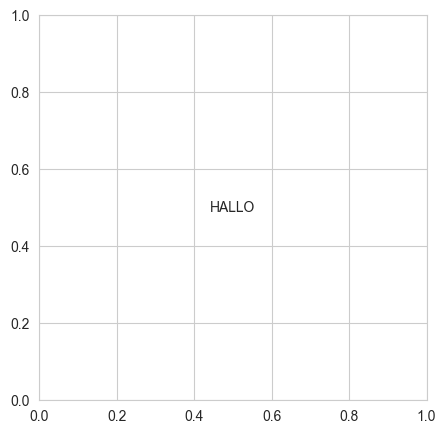

In [130]:
#Das erste Argument ist der Text, ha ist die horizontale Ausrichtung, va ist die vertikale Ausrichtung, xy sind die Koordinaten des Punktes, xytext sind die Koordinaten des Textes (wenn der Text vom Punkt entfernt sein soll)
fig,ax = plt.subplots(figsize=(5,5))
ax.annotate(text='HALLO',ha='center',va='center', xy = (0.5, 0.5), xytext=(0.5,0.5), fontsize=10)
plt.show()

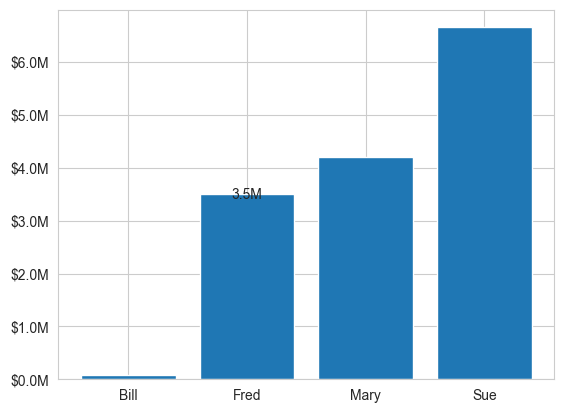

In [134]:
#Annotation mit Daten kombinieren
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(milliondollar))

#Daten eingeben
money = [0.815e5, 3.50e6, 4.20e6, 6.66e6]
ax.bar(['Bill', 'Fred', 'Mary', 'Sue'], money)
ax.annotate(text=format(money[1]/1000000, ".1f")+"M", ha='center',va='center', xy = (1,3500000), xytext=(1,3500000), fontsize=10)
plt.show()

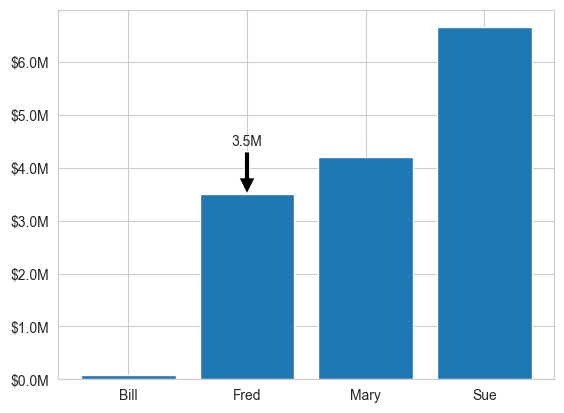

In [156]:
#Annotation verschoben und mit Pfeil
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(milliondollar))

money = [0.815e5, 3.50e6, 4.20e6, 6.66e6]
ax.bar(['Bill', 'Fred', 'Mary', 'Sue'], money)
ax.annotate(text=format(money[1]/1000000, ".1f")+"M", ha='center',va='center', xy = (1,3500000), xytext=(1,4500000), fontsize=10, arrowprops=dict(facecolor='black'))
plt.show()

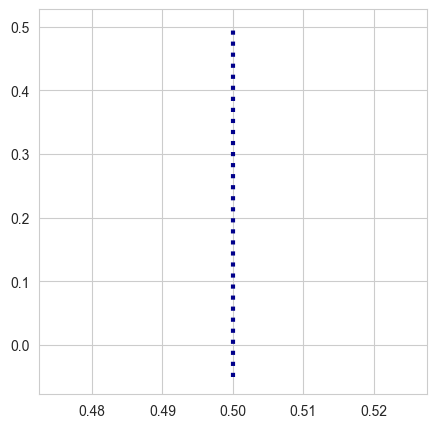

In [173]:
#Vertikale-Linie mit X-Koordinate, Min- und Max-Bereich mit Y- und eigenen Eigenschaften hinzufügen
fig,ax = plt.subplots(figsize=(5,5))
plt.vlines(x=0.5,ymin=-0.05,ymax=0.5,ls=':',lw=3,color='darkblue')

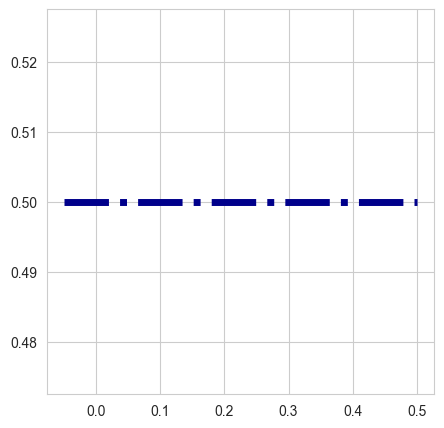

In [175]:
#Horizontale-Linie mit Y-Koordinate, Min- und Max-Bereiche mit x- und eigenen Eigenschaften hinzufügen
fig,ax = plt.subplots(figsize=(5,5))
plt.hlines(y=0.5,xmin=-0.05,xmax=0.5,ls='-.',lw=5,color='darkblue')

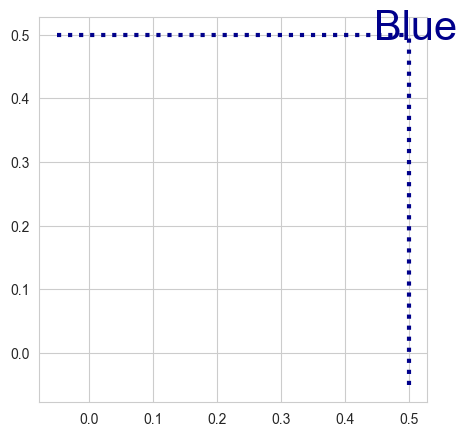

In [176]:
#Anmerkung, v-Linien und h-Linien wie oben erklärt
fig,ax = plt.subplots(figsize=(5,5))
ax.annotate('Blue',ha='center',va='center', xy = (0.5, 0.5), xytext=(0.51,0.51),fontsize=30,color='darkblue')
plt.vlines(x=0.5,ymin=-0.05,ymax=0.5,ls=':',lw=3,color='darkblue')
plt.hlines(y=0.5,xmin=-0.05,xmax=0.5,ls=':',lw=3,color='darkblue')

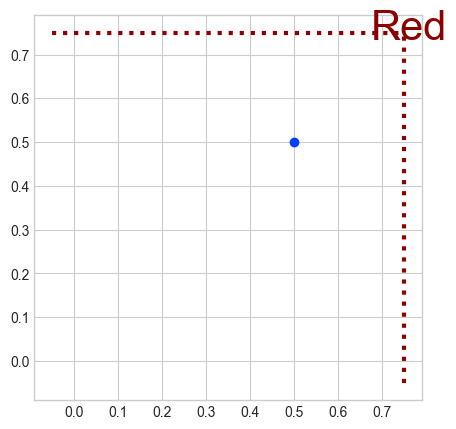

In [73]:
#Anmerkungen, v-lines & h-lines
fig,ax = plt.subplots(figsize=(5,5))
ax.annotate('Red',ha='center',va='center', xy = (0.75, 0.75), xytext=(0.76,0.76),fontsize=30,color='darkred')
ax.scatter(x=0.5,y=0.5,label='Blue point')
plt.vlines(x=0.75,ymin=-0.05,ymax=0.75,ls=':',lw=3,color='darkred')
plt.hlines(y=0.75,xmin=-0.05,xmax=0.75,ls=':',lw=3,color='darkred')

### Übung:

Nutze das Datenset "20230504_3.3_Datensatz_abi_vs_uni.xlsx" und erstelle aus den Messdaten einen Scatterplot. Identifiziere in diesem Scatterplot den Ausreißer, zeige auf diesen mit einer horizontalen und vertikalen durchgezogenenen (kein dash) Linie und schreibe die Personennummer dieser Person (wenn es Person 2 wäre also zum Beispiel: "Pers-Nr.: 2").


# Merkblatt für alles

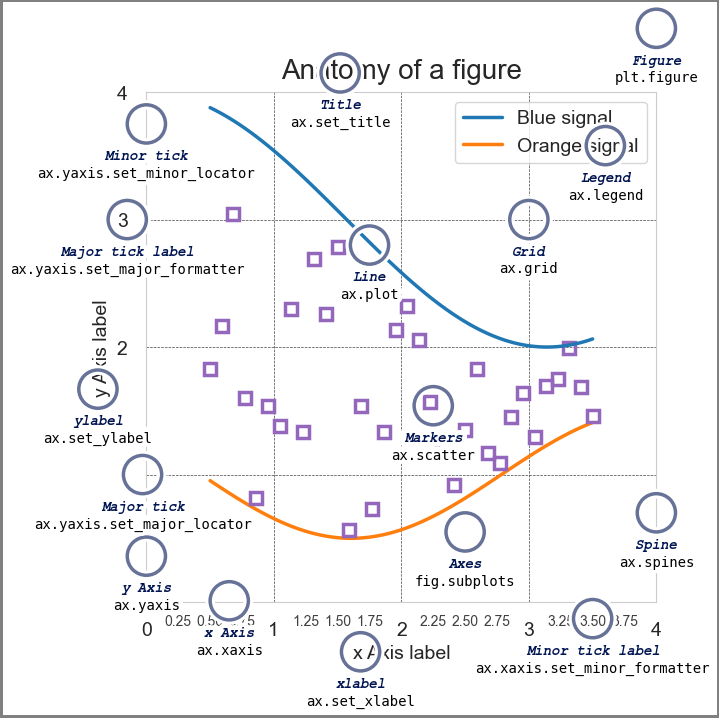

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

royal_blue = [0, 20/256, 82/256]


# make the figure

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1)

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter("{x:.2f}")

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0, length=10, labelsize=14)
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10,
               labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10)
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal")
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9,
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x Axis label", fontsize=14)
ax.set_ylabel("y Axis label", fontsize=14)
ax.legend(loc="upper right", fontsize=14)


# Annotate the figure

def annotate(x, y, text, code):
    # Circle marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c)

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
        color = 'white' if path_effects else royal_blue
        ax.text(x, y-0.2, text, zorder=100,
                ha='center', va='top', weight='bold', color=color,
                style='italic', fontfamily='Courier New',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black'
        ax.text(x, y-0.33, code, zorder=100,
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)


annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5')
plt.show()

# Weitere Beispiele 

Bitte bei Anmerkungen immer direkt hier schauen: [Klick](https://matplotlib.org/stable/index.html)
Siehe die .py-Dateien für den heutigen Tag